##### MST IASD 2023-2024 (Département Génie Informatique)
##### Sujet 8 : Méthode probabiliste
##### Group membres : Chibani Fahd,Samady Ahmed et FAKHRE-EDDINE MOHAMED AMINE
##### Dataset: 
##### Modèle : EM-algorithme

# What is the Expectation-Maximization algorithm

###### The Expectation-Maximization (EM) algorithm is a powerful statistical technique widely employed in various fields, including machine learning, statistics, and data analysis. Developed as a general framework for estimating parameters in probabilistic models, EM is particularly adept at handling situations involving incomplete or missing data.

# Uses of EM Algorithm

###### - Used in part-of-speech tagging to identify and label parts of speech in a given text.
###### - Used as the basis of the unsupervised learning of clusters.
###### - Used in bioinformatics for tasks such as protein structure prediction and gene expression analysis.
###### - Applied in pattern recognition tasks, such as handwriting recognition and face recognition.
###### - Used in the field of image processing for tasks such as image segmentation and object recognition.
###### These are just a few examples, and the EM algorithm has broad applicability across different domains

# Steps of EM Algorithm

###### Step 1: Given a set of incomplete data, consider a set of starting parameters (Initialization).
###### Step 2 - Expectation (E-step): In the E-step, initial estimates are made and probabilities are assigned to each observation based on these estimates.
###### Step 3 - Maximization (M-step): In the M-step, the assigned probabilities from the E-step are used to update the estimates, refining them based on the assigned weights.
###### Step 4 - Iteration: The E-step and M-step are repeated iteratively, with each iteration improving the estimates based on the updated probabilities.
###### Step 5 - Convergence: The iterative process continues until convergence, where the estimates reach a stable state and the algorithm stops updating.
<br>
<br>
<center>
    <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8226007%2F4dc665c51e1f5000a6e68cf5f7ff766a%2FEM%20Algo_New.png?generation=1689604291527384&alt=media" alt="EM algo steps">
</center>


In [19]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for simplicity

In [20]:
# Function to initialize parameters
def initialize_parameters(X, num_clusters):
    n_samples, n_features = X.shape
    mean = X[np.random.choice(n_samples, num_clusters, replace=False)]
    cov = [np.eye(n_features) for _ in range(num_clusters)]
    weight = np.ones(num_clusters) / num_clusters
    return mean, cov, weight

In [21]:
# Function to calculate the probability density function of multivariate normal distribution
def multivariate_normal_pdf(x, mean, cov):
    k = len(mean)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, inv_cov), (x - mean))
    return (1 / ((2 * np.pi) ** (k / 2) * det_cov ** 0.5)) * np.exp(exponent)


In [22]:
# Function to perform Expectation step
def expectation_step(X, mean, cov, weight):
    num_clusters = len(mean)
    n_samples = X.shape[0]
    responsibilities = np.zeros((n_samples, num_clusters))

    for i in range(num_clusters):
        for j in range(n_samples):
            responsibilities[j, i] = weight[i] * multivariate_normal_pdf(X[j], mean[i], cov[i])

    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

In [23]:
# Function to perform Maximization step
def maximization_step(X, responsibilities):
    num_clusters = responsibilities.shape[1]
    n_samples, n_features = X.shape

    # Update weights
    weight = responsibilities.sum(axis=0) / n_samples

    # Update mean
    mean = np.dot(responsibilities.T, X) / responsibilities.sum(axis=0, keepdims=True).T

    # Update covariance
    cov = [np.zeros((n_features, n_features)) for _ in range(num_clusters)]
    for i in range(num_clusters):
        for j in range(n_samples):
            diff = X[j] - mean[i]
            cov[i] += responsibilities[j, i] * np.outer(diff, diff)
        cov[i] /= responsibilities[:, i].sum()

    return mean, cov, weight

In [24]:
# Function to calculate log-likelihood
def calculate_log_likelihood(X, mean, cov, weight):
    num_clusters = len(mean)
    n_samples = X.shape[0]

    log_likelihood = 0
    for i in range(n_samples):
        likelihood = sum(weight[j] * multivariate_normal_pdf(X[i], mean[j], cov[j]) for j in range(num_clusters))
        log_likelihood += np.log(likelihood)

    return log_likelihood

In [25]:
# Function to perform EM algorithm
def expectation_maximization(X, num_clusters, max_iterations=100, tol=1e-4):
    mean, cov, weight = initialize_parameters(X, num_clusters)

    for iteration in range(max_iterations):
        # Expectation step
        responsibilities = expectation_step(X, mean, cov, weight)

        # Maximization step
        mean, cov, weight = maximization_step(X, responsibilities)

        # Calculate log-likelihood
        log_likelihood = calculate_log_likelihood(X, mean, cov, weight)

        # Convergence check
        if iteration > 0 and np.abs(log_likelihood - prev_log_likelihood) < tol:
            break

        prev_log_likelihood = log_likelihood

    return mean, cov, weight

In [26]:
# Perform EM algorithm with 2 clusters
num_clusters = 2
mean, cov, weight = expectation_maximization(X, num_clusters)

# Assign clusters based on maximum responsibility
responsibilities = expectation_step(X, mean, cov, weight)
clusters = np.argmax(responsibilities, axis=1)

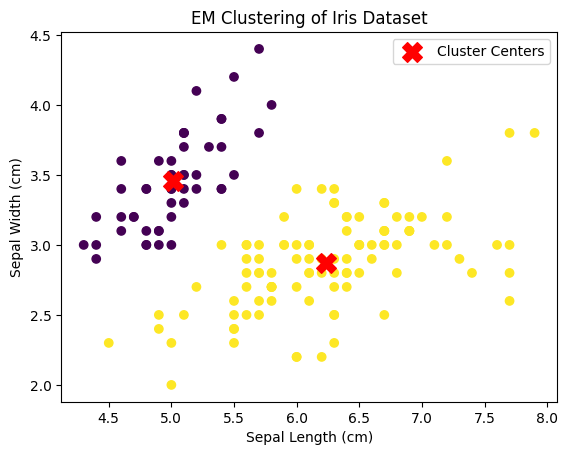

In [27]:

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(mean[:, 0], mean[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('EM Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()